In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_secret


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User
target_user = "realdonaldtrump"

# Create array to record all date-times of tweets
tweet_times = []

# Loop through 500 tweets
for x in range(1, 26):
    
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    # YOUR CODE HERE
    for tweet in public_tweets:
        raw_time = tweet["created_at"]
        print(raw_time)
    tweet_times.append(raw_time)

# Confirm tweet counts
len(tweet_times)

Tue Sep 25 13:14:04 +0000 2018
Tue Sep 25 10:53:41 +0000 2018
Tue Sep 25 10:41:20 +0000 2018
Tue Sep 25 02:50:09 +0000 2018
Tue Sep 25 02:38:39 +0000 2018
Tue Sep 25 00:22:46 +0000 2018
Mon Sep 24 23:41:37 +0000 2018
Mon Sep 24 22:33:39 +0000 2018
Mon Sep 24 21:46:22 +0000 2018
Mon Sep 24 21:33:33 +0000 2018
Mon Sep 24 20:44:24 +0000 2018
Mon Sep 24 20:42:22 +0000 2018
Mon Sep 24 16:55:18 +0000 2018
Mon Sep 24 14:17:26 +0000 2018
Mon Sep 24 14:13:22 +0000 2018
Sun Sep 23 22:48:33 +0000 2018
Sun Sep 23 20:52:37 +0000 2018
Sun Sep 23 20:43:52 +0000 2018
Sat Sep 22 19:39:15 +0000 2018
Sat Sep 22 14:56:35 +0000 2018
Sat Sep 22 14:01:05 +0000 2018
Sat Sep 22 03:20:49 +0000 2018
Sat Sep 22 03:13:26 +0000 2018
Sat Sep 22 03:11:53 +0000 2018
Sat Sep 22 03:09:52 +0000 2018
Sat Sep 22 03:09:25 +0000 2018
Sat Sep 22 01:31:42 +0000 2018
Sat Sep 22 01:05:00 +0000 2018
Fri Sep 21 21:44:11 +0000 2018
Fri Sep 21 20:51:44 +0000 2018
Fri Sep 21 20:26:58 +0000 2018
Fri Sep 21 20:25:20 +0000 2018
Fri Sep 

Wed Sep 05 13:51:29 +0000 2018
Wed Sep 05 13:39:54 +0000 2018
Wed Sep 05 13:21:07 +0000 2018
Wed Sep 05 13:20:22 +0000 2018
Wed Sep 05 11:33:18 +0000 2018
Wed Sep 05 03:35:30 +0000 2018
Wed Sep 05 03:32:16 +0000 2018
Wed Sep 05 03:01:43 +0000 2018
Wed Sep 05 02:50:19 +0000 2018
Tue Sep 04 23:18:08 +0000 2018
Tue Sep 04 22:49:35 +0000 2018
Tue Sep 04 22:38:06 +0000 2018
Tue Sep 04 22:37:09 +0000 2018
Tue Sep 04 21:03:50 +0000 2018
Tue Sep 04 20:55:41 +0000 2018
Tue Sep 04 20:44:49 +0000 2018
Tue Sep 04 20:41:38 +0000 2018
Tue Sep 04 20:41:37 +0000 2018
Tue Sep 04 20:40:28 +0000 2018
Tue Sep 04 18:24:52 +0000 2018
Tue Sep 04 14:58:21 +0000 2018
Mon Sep 03 22:20:17 +0000 2018
Mon Sep 03 19:21:26 +0000 2018
Mon Sep 03 18:55:35 +0000 2018
Mon Sep 03 18:39:19 +0000 2018
Mon Sep 03 18:25:25 +0000 2018
Mon Sep 03 17:57:10 +0000 2018
Mon Sep 03 17:50:59 +0000 2018
Mon Sep 03 17:50:01 +0000 2018
Mon Sep 03 15:28:33 +0000 2018
Mon Sep 03 12:23:33 +0000 2018
Mon Sep 03 11:28:14 +0000 2018
Mon Sep 

25

In [4]:
# Convert all tweet times into datetime objects
tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(tweet_times[x])
        print(tweet_datetime)

Sat Sep 22 14:56:35 +0000 2018
2018-09-22 14:56:35+00:00


In [5]:
# Calculate the time between tweets
# Convert all tweet times into datetime objects
time_in_between = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    time_in_between.append(hrs_apart)

# Hours Between Tweets
print(f"Avg. Hours Between Tweets: {np.mean(time_in_between)}")

Avg. Hours Between Tweets: 13.136388888888888


In [6]:
time_in_between[:10]

[23.450277777777778,
 1.9219444444444445,
 21.721666666666668,
 6.0569444444444445,
 12.312777777777777,
 20.951666666666668,
 12.998333333333333,
 23.219722222222224,
 11.981111111111112,
 10.373611111111112]

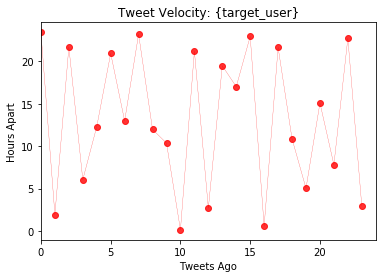

In [7]:
# Use MatPlotLib to plot the time between Tweets
# YOUR CODE HERE
plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")
plt.xlim([0, len(time_in_between)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Tweet Velocity: {target_user}")
plt.show()